# NLP Application with ML

## Classification of Tweets Data

### The Data

🔑 Source: https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from sklearn.metrics import f1_score
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
!python -V

Python 3.7.12


In [ ]:
!pip install scikit-learn==1.0.1

In [ ]:
import sklearn
print(sklearn.__version__)

1.0.1


### Notebook Settings

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', None)

sns.set_context(context='talk', font_scale=1, rc={'figure.figsize':(11.7,8.27)})
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Getting Data

In [ ]:
# For Colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Clarusway_NLP/Clarusway/clarusway-ds-students-7-21-main/3- Classes_Labs/NLP/NLP-1/airline_tweets.csv')
#df = pd.read_csv("airline_tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.00,NaN,nan,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.35,NaN,0.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.68,NaN,nan,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.00,Bad Flight,0.70,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.00,Can't Tell,1.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


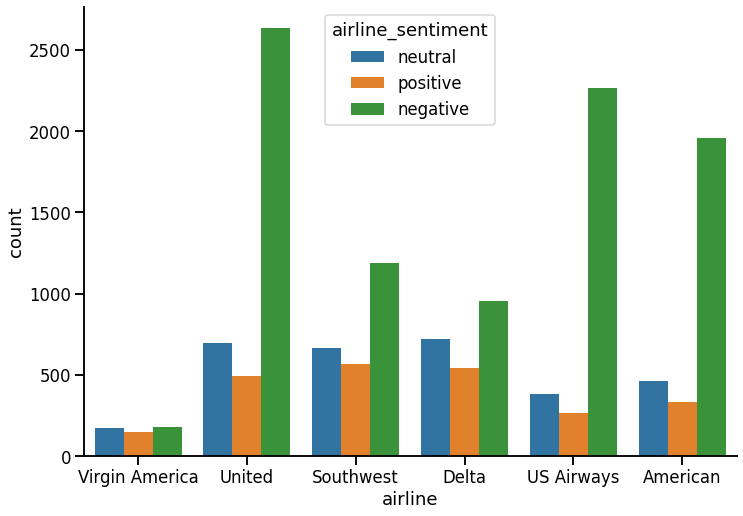

In [ ]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.countplot(data = df, x ="airline", hue = "airline_sentiment")
sns.despine();

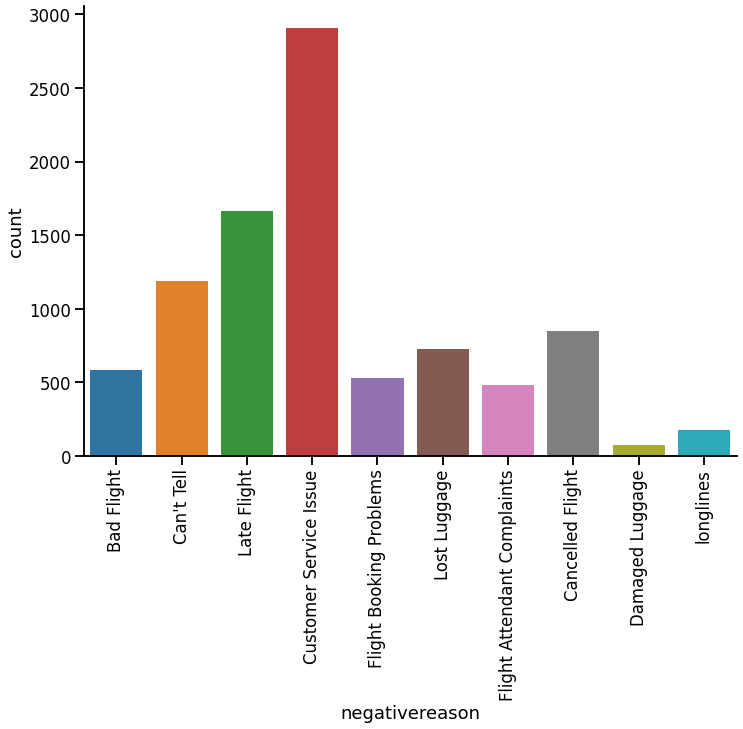

In [ ]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.countplot(data =df, x ="negativereason")
plt.xticks(rotation =90)
sns.despine();

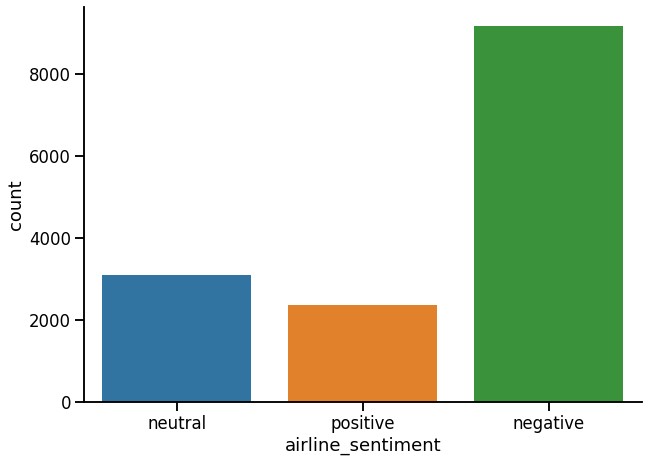

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7.27)
sns.countplot(data =df, x = "airline_sentiment")
sns.despine();

In [ ]:
df["airline_sentiment"].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

## Cleaning Data and Removing Rare Words

In [ ]:
df2 = df.copy()

In [ ]:
df2["text"]

0                                                                                                                           @VirginAmerica What @dhepburn said.
1                                                                                      @VirginAmerica plus you've added commercials to the experience... tacky.
2                                                                                       @VirginAmerica I didn't today... Must mean I need to take another trip!
3                                @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
4                                                                                                       @VirginAmerica and it's a really big bad thing about it
                                                                                  ...                                                                          
14635                                   

In [ ]:
words = pd.Series(" ".join(df2["text"]).split()).value_counts()
words

to          8535
the         5781
I           5054
a           4359
for         3921
            ... 
Boston'        1
DFW/ORD?       1
college,       1
SUCKS.         1
Evry           1
Length: 30105, dtype: int64

In [ ]:
rare_words = words[words < 2]

In [ ]:
print(rare_words.index)
print('\n number of TOTAL words :', len(words))
print('\n number of RARE words  :', len(rare_words))

Index(['#reservations', 'Catering', 'seats)', 'TLH.', 'nc', 'amazing!!',
       'Vegas-Chicago', 'thier', '"@united:', 'JFK-LAS.',
       ...
       'post?', 'terrible.no', '"rampers"', '10pm.', 'Ripoff,Quick', 'Boston'',
       'DFW/ORD?', 'college,', 'SUCKS.', 'Evry'],
      dtype='object', length=19812)

 number of TOTAL words : 30105

 number of RARE words  : 19812


In [ ]:
df2["text"] = df2["text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df2["text"].head()

0                                                                                 @VirginAmerica What said.
1                                                       @VirginAmerica plus you've added commercials to the
2                                   @VirginAmerica I didn't today... Must mean I need to take another trip!
3    @VirginAmerica it's really aggressive to blast obnoxious in your faces &amp; they have little recourse
4                                                   @VirginAmerica and it's a really big bad thing about it
Name: text, dtype: object

## Cleaning Data

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
stop_words = stopwords.words('english')
words_to_exclude_from_stopwords = ['not', "n't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", "don't", 'hadn', 
                                   "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 
                                   'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', 
                                   "won't", 'wouldn', "wouldn't"]

new_stopwords = [w for w in stop_words if w not in words_to_exclude_from_stopwords]

In [ ]:
# ##### !!!!!!!!!!
# a = "I don't want to fly with your company." # vs "I do not want to fly with your company" 
# [token for token in word_tokenize(a) if token not in stop_words] 

In [ ]:
def cleaning(data):

    import re
    
    #1. Removing URLS
    data = re.sub(r'http\S+', '', data)

    #2. Removing Tags
    data = re.sub(r'#\w+', '', data)

    #3. Removing Mentions
    data = re.sub(r'@\w+', '', data)

    #4. Contractions Expension & Tokenize
    #text_tokens = word_tokenize(contractions.fix(data.lower())) 
    text_tokens = word_tokenize(data.replace("'", '').lower())

    # #5. Removing mentions
    # tokens_without_mention = [w for w in text_tokens if not w.startswith('@')]
    
    #6. Remove Puncs
    tokens_without_punc = [w for w in tokens_without_mention if w.isalpha()]
    
    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in new_stopwords]
    
    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [ ]:
df2["cleaned_text"] = df2["text"].apply(cleaning)
df2[['text', 'cleaned_text']]

,text,cleaned_text
0,@VirginAmerica What @dhepburn said.,said
1,@VirginAmerica plus you've added commercials to the experience... tacky.,plus youve added commercial experience tacky
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,didnt today must mean need take another trip
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",really aggressive blast obnoxious entertainment guest face amp little recourse
4,@VirginAmerica and it's a really big bad thing about it,really big bad thing
...,...,...
14635,@AmericanAir thank you we got on a different flight to Chicago.,thank got different flight chicago
14636,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,leaving minute late flight warning communication minute late flight thats called shitty customer svc
14637,@AmericanAir Please bring American Airlines to #BlackBerry10,please bring american airline
14638,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",money change flight dont answer phone suggestion make commitment


## Features and Label

In [ ]:
df2.rename(columns={'airline_sentiment':'sentiment'}, inplace=True)
df2 = df2.loc[:, ["sentiment", "cleaned_text"]]
df2.head()

,sentiment,cleaned_text
0,neutral,said
1,positive,plus youve added commercial experience tacky
2,neutral,didnt today must mean need take another trip
3,negative,really aggressive blast obnoxious entertainment guest face amp little recourse
4,negative,really big bad thing


## Train Test Split

In [ ]:
#df2 = df2[['sentiment','text']]

In [ ]:
X = df2['cleaned_text']
y = df2['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=4299)

## Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=2, ngram_range=(1,2))
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [ ]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# ngram https://stackoverflow.com/questions/36572221/how-to-find-ngram-frequency-of-a-column-in-a-pandas-dataframe
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aa,aa agent,aa also,aa amp,aa customer,aa dallas,aa doesnt,aa email,aa employee,aa family,aa flight,aa gate,aa gold,aa help,aa know,aa monday,aa number,aa platinum,aa possible,aa usair,aa would,aadv,aadv svc,aadvantage,aadvantage number,...,youve,youve always,youve cancelled,youve got,youve known,youve lost,youve misunderstood,yr,yr flying,yr old,yr team,yuma,yup,yvonne,yvr,yyz,yyz terminal,zero,zero communication,zero entertainment,zero response,zone,zone nine,zoom,zurich
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11708,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11709,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Model Comparisons - Vectorization

In [ ]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [ ]:
def eval(model, X_test):
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    sns.set_context('talk')
    fig, ax = plt.subplots(figsize=(7, 7))
    plot_confusion_matrix(model, X_test, y_test, ax = ax, values_format = '.0f')

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB # BernoulliNB for binary model

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_count,y_train)

MultinomialNB()

NB MODEL
              precision    recall  f1-score   support

    negative       0.78      0.93      0.85      1835
     neutral       0.67      0.40      0.50       620
    positive       0.77      0.58      0.66       473

    accuracy                           0.76      2928
   macro avg       0.74      0.64      0.67      2928
weighted avg       0.75      0.76      0.74      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


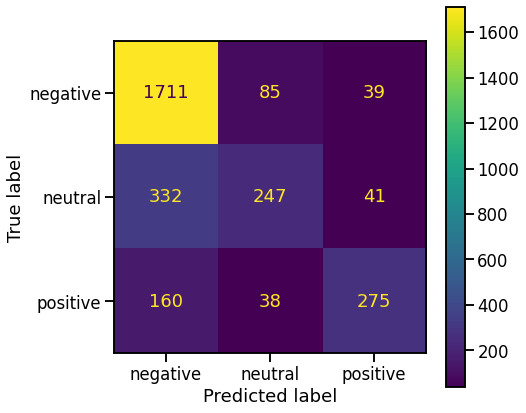

In [ ]:
print("NB MODEL")
eval(nb, X_test_count)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_count,y_train)

LogisticRegression(max_iter=1000)

LOG MODEL
              precision    recall  f1-score   support

    negative       0.84      0.89      0.87      1835
     neutral       0.63      0.58      0.61       620
    positive       0.73      0.64      0.68       473

    accuracy                           0.78      2928
   macro avg       0.73      0.71      0.72      2928
weighted avg       0.78      0.78      0.78      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


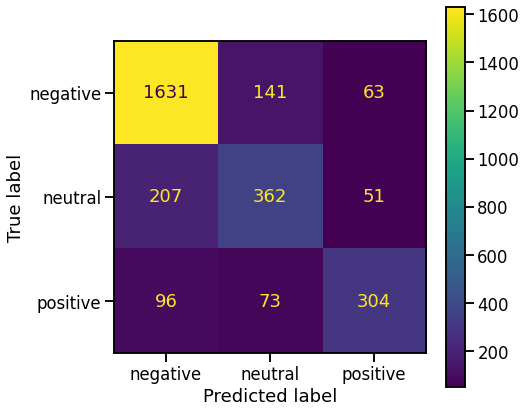

In [ ]:
print("LOG MODEL")
eval(log, X_test_count)

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000, class_weight='balanced')
log.fit(X_train_count,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

LOG MODEL BALANCED
              precision    recall  f1-score   support

    negative       0.89      0.80      0.84      1835
     neutral       0.55      0.67      0.61       620
    positive       0.64      0.71      0.67       473

    accuracy                           0.76      2928
   macro avg       0.69      0.73      0.71      2928
weighted avg       0.78      0.76      0.77      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


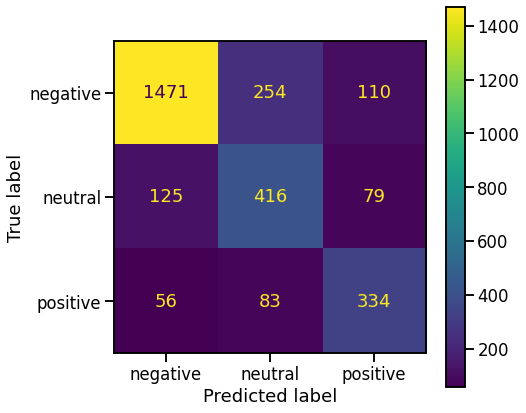

In [ ]:
print("LOG MODEL BALANCED")
eval(log, X_test_count)

## SVM

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.2)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.2)

SVC MODEL
              precision    recall  f1-score   support

    negative       0.85      0.88      0.86      1835
     neutral       0.61      0.58      0.60       620
    positive       0.71      0.66      0.68       473

    accuracy                           0.78      2928
   macro avg       0.72      0.71      0.71      2928
weighted avg       0.78      0.78      0.78      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


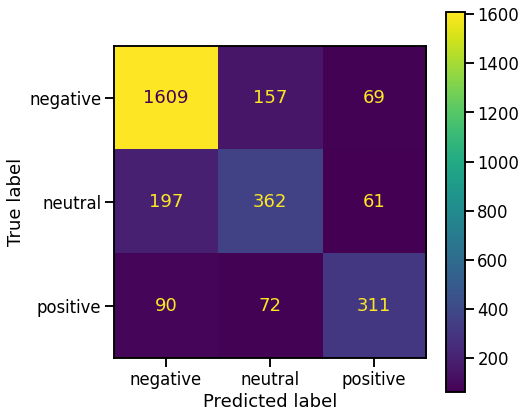

In [ ]:
print("SVC MODEL")
eval(svc, X_test_count)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_count,y_train)

KNeighborsClassifier(n_neighbors=3)

KNN MODEL
              precision    recall  f1-score   support

    negative       0.73      0.67      0.70      1835
     neutral       0.30      0.41      0.34       620
    positive       0.58      0.50      0.54       473

    accuracy                           0.58      2928
   macro avg       0.54      0.52      0.53      2928
weighted avg       0.61      0.58      0.60      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


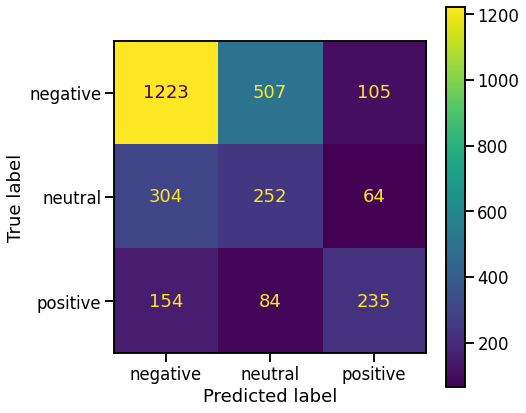

In [ ]:
print("KNN MODEL")
eval(knn, X_test_count)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(500, random_state = 4299, n_jobs = -1) # class_weight="balanced"
rf.fit(X_train_count, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=4299)

RF MODEL
              precision    recall  f1-score   support

    negative       0.81      0.91      0.86      1835
     neutral       0.63      0.51      0.57       620
    positive       0.73      0.59      0.65       473

    accuracy                           0.77      2928
   macro avg       0.72      0.67      0.69      2928
weighted avg       0.76      0.77      0.76      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


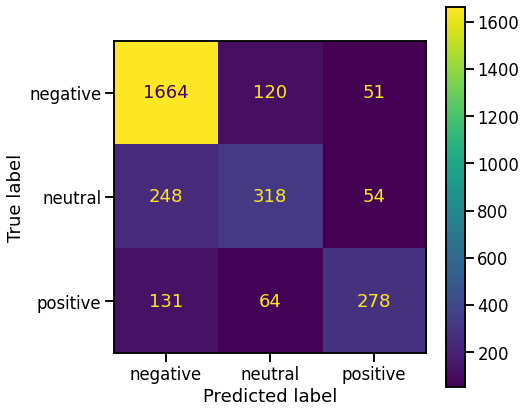

In [ ]:
print("RF MODEL")
eval(rf, X_test_count)

In [ ]:
rf = RandomForestClassifier(500, random_state = 4299, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=500, n_jobs=-1,
                       random_state=4299)

RF MODEL BALANCED
              precision    recall  f1-score   support

    negative       0.82      0.89      0.85      1835
     neutral       0.60      0.54      0.57       620
    positive       0.70      0.59      0.64       473

    accuracy                           0.77      2928
   macro avg       0.71      0.67      0.69      2928
weighted avg       0.76      0.77      0.76      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


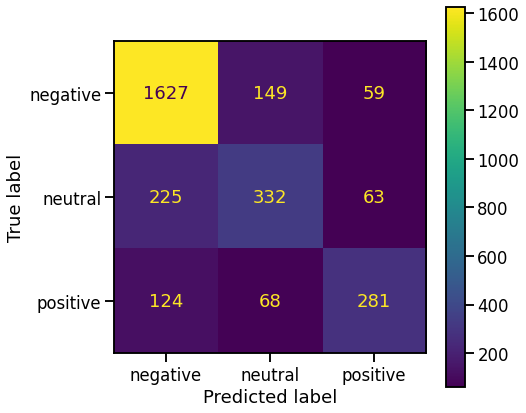

In [ ]:
print("RF MODEL BALANCED")
eval(rf, X_test_count)

## Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

Ada MODEL
              precision    recall  f1-score   support

    negative       0.83      0.85      0.84      1835
     neutral       0.56      0.59      0.57       620
    positive       0.70      0.60      0.65       473

    accuracy                           0.76      2928
   macro avg       0.70      0.68      0.69      2928
weighted avg       0.75      0.76      0.75      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


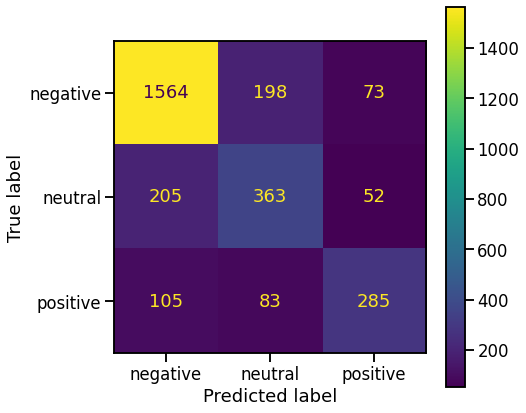

In [ ]:
print("Ada MODEL")
eval(ada, X_test_count)

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_idf_vectorizer = TfidfVectorizer(min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [ ]:
X_train_tf_idf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.32255727],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aadvantage,abc,ability,able,aboard,abq,absolute,absolutely,absurd,abt,accept,acceptable,accepted,accepting,access,accommodate,accommodating,accommodation,according,account,accountability,acct,accurate,across,...,yall,yay,yea,yeah,year,yelled,yep,yes,yest,yesterday,yet,yo,york,youd,youll,young,youre,youth,youve,yr,yup,yvr,yyz,zero,zone
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.32
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11707,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
11708,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
11709,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
11710,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Model Comparisons  TF-IDF

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tf_idf,y_train)

MultinomialNB()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


NB MODEL
              precision    recall  f1-score   support

    negative       0.72      0.98      0.83      1835
     neutral       0.71      0.26      0.38       620
    positive       0.87      0.40      0.55       473

    accuracy                           0.73      2928
   macro avg       0.77      0.55      0.59      2928
weighted avg       0.74      0.73      0.69      2928



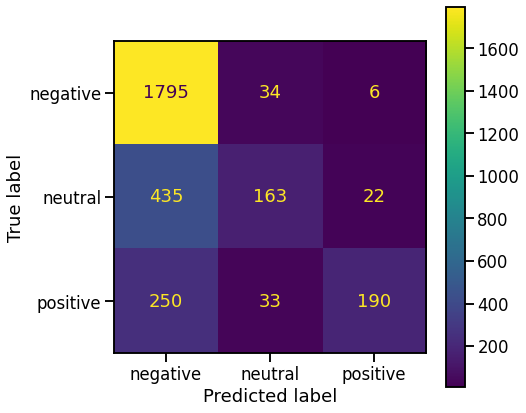

In [ ]:
print("NB MODEL")
eval(nb, X_test_tf_idf)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tf_idf,y_train)

LogisticRegression(max_iter=1000)

LOG MODEL
              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1835
     neutral       0.65      0.48      0.56       620
    positive       0.80      0.57      0.67       473

    accuracy                           0.78      2928
   macro avg       0.75      0.66      0.70      2928
weighted avg       0.77      0.78      0.77      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


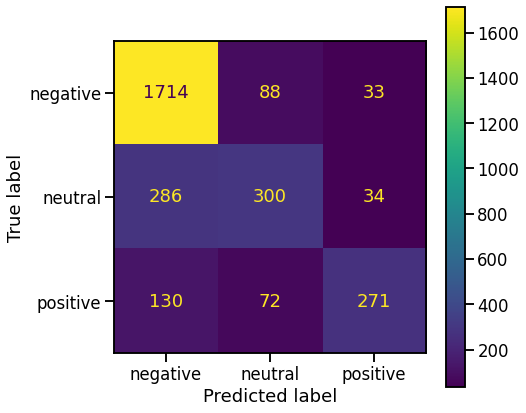

In [ ]:
print("LOG MODEL")
eval(log, X_test_tf_idf)

### TO SAVE A MODEL

In [ ]:
import pickle
pickle.dump(log, open('logreg_tweet_classifier.pkl', 'wb'))

In [ ]:
import pickle
pickle.dump(tf_idf_vectorizer, open("tfidf_vectorizer.pkl","wb"))

In [ ]:
loaded_tfidf_vec = pickle.load(open('tfidf_vectorizer.pkl', 'rb'))
#loaded_tfidf_vec = TfidfVectorizer(decode_error="replace",vocabulary=pickle.load(open("tfidf_vectorizer.pkl", "rb")))

In [ ]:
loaded_logreg = pickle.load(open('logreg_tweet_classifier.pkl', 'rb'))

In [ ]:
vectorized_tweet = loaded_tfidf_vec.transform(['Awesome flight'])
prediction = loaded_logreg.predict(vectorized_tweet)

In [ ]:
prediction

array(['positive'], dtype=object)

In [ ]:
pd.Series("I want to go there").apply(cleaning)

0    want go
dtype: object

In [ ]:
import numpy as np
text = "Awesome flight"
cleaned_text = pd.Series(text).apply(cleaning)
vectorized_text = loaded_tfidf_vec.transform([text]).toarray()
prediction = loaded_logreg.predict(vectorized_text)
prob = loaded_logreg.predict_proba(vectorized_text)
prediction[0], np.max(np.round(prob,3))

('positive', 0.891)

In [ ]:
log = LogisticRegression(max_iter=1000, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

LOG MODEL BALANCED
              precision    recall  f1-score   support

    negative       0.90      0.78      0.83      1835
     neutral       0.53      0.71      0.61       620
    positive       0.64      0.71      0.68       473

    accuracy                           0.75      2928
   macro avg       0.69      0.73      0.71      2928
weighted avg       0.78      0.75      0.76      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


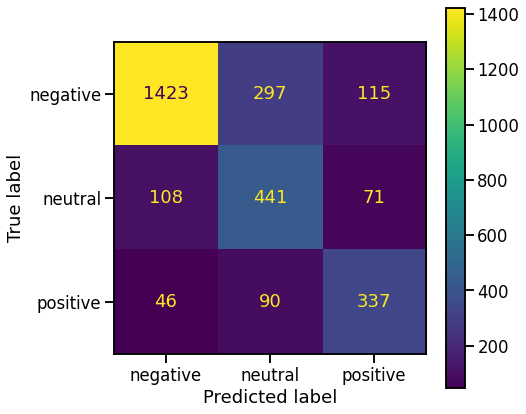

In [ ]:
print("LOG MODEL BALANCED")
eval(log, X_test_tf_idf)

## SVM

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tf_idf,y_train)

LinearSVC()

SVC MODEL
              precision    recall  f1-score   support

    negative       0.83      0.89      0.86      1835
     neutral       0.61      0.54      0.57       620
    positive       0.71      0.62      0.66       473

    accuracy                           0.77      2928
   macro avg       0.72      0.68      0.70      2928
weighted avg       0.76      0.77      0.77      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


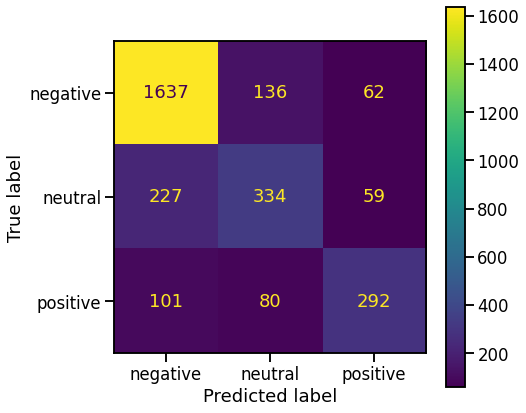

In [ ]:
print("SVC MODEL")
eval(svc, X_test_tf_idf)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_tf_idf,y_train)

KNeighborsClassifier(n_neighbors=8)

KNN MODEL
              precision    recall  f1-score   support

    negative       0.72      0.20      0.31      1835
     neutral       0.23      0.83      0.35       620
    positive       0.73      0.21      0.32       473

    accuracy                           0.33      2928
   macro avg       0.56      0.41      0.33      2928
weighted avg       0.61      0.33      0.32      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


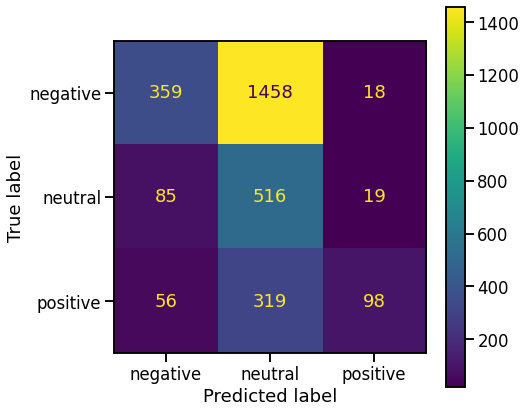

In [ ]:
print("KNN MODEL")
eval(knn, X_test_tf_idf)

## RandomForest

In [ ]:
rf = RandomForestClassifier(500, random_state = 42, n_jobs = -1)
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

RF MODEL
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1835
     neutral       0.63      0.47      0.54       620
    positive       0.72      0.54      0.62       473

    accuracy                           0.76      2928
   macro avg       0.72      0.64      0.67      2928
weighted avg       0.75      0.76      0.75      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


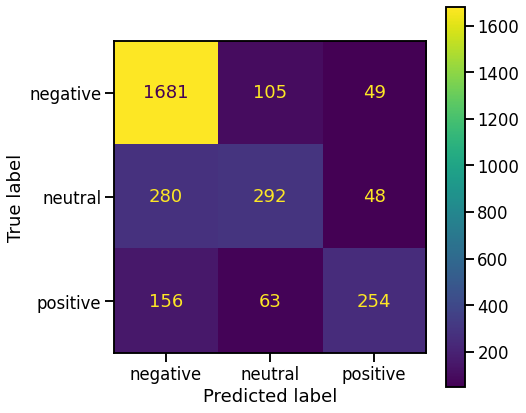

In [ ]:
print("RF MODEL")
eval(rf, X_test_tf_idf)

In [ ]:
rf = RandomForestClassifier(500, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=500, n_jobs=-1,
                       random_state=42)

RF MODEL BALANCED
              precision    recall  f1-score   support

    negative       0.81      0.91      0.86      1835
     neutral       0.64      0.50      0.56       620
    positive       0.70      0.56      0.62       473

    accuracy                           0.77      2928
   macro avg       0.72      0.66      0.68      2928
weighted avg       0.76      0.77      0.76      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


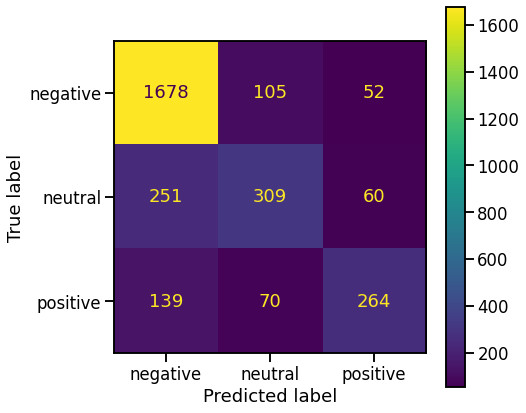

In [ ]:
print("RF MODEL BALANCED")
eval(rf, X_test_tf_idf)

## Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

Ada MODEL
              precision    recall  f1-score   support

    negative       0.82      0.85      0.83      1835
     neutral       0.53      0.57      0.55       620
    positive       0.70      0.56      0.62       473

    accuracy                           0.74      2928
   macro avg       0.68      0.66      0.67      2928
weighted avg       0.74      0.74      0.74      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


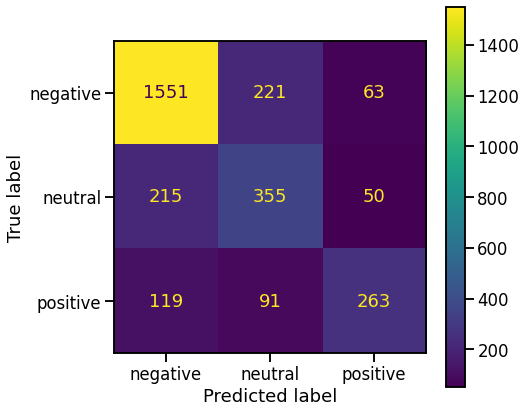

In [ ]:
print("Ada MODEL")
eval(ada, X_test_tf_idf)

In [ ]:
def get_results_for_a_given_algorithm(estimator, X_train, y_train, X_test, y_test):

    model = estimator.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_scr = f1_score(y_test, y_pred, average='weighted')
    print(f'{estimator} Evalaution Metrics \n')
    #eval(model, X_test)

    return f1_scr

In [ ]:
classifiers = [AdaBoostClassifier(), LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(n_neighbors=8)]
score_df = pd.DataFrame()
for idx, classifier in enumerate(classifiers):
    f1 = get_results_for_a_given_algorithm(classifier, X_train_tf_idf, y_train, X_test_tf_idf, y_test)
    score_df.loc[idx, 'model'] = str(classifier).split('(')[0]
    score_df.loc[idx, 'f1_score'] = f1


AdaBoostClassifier() Evalaution Metrics 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression() Evalaution Metrics 

RandomForestClassifier() Evalaution Metrics 

KNeighborsClassifier(n_neighbors=8) Evalaution Metrics 



In [ ]:
score_df.sort_values(by='f1_score', ascending=False)
#score_df.reset_index(drop=True, inplace=True)

,model,f1_score
1,LogisticRegression,0.78
2,RandomForestClassifier,0.74
0,AdaBoostClassifier,0.63
3,KNeighborsClassifier,0.31


## Cross Val

In [ ]:
classifier_names = [str(i).split('(')[0] for i in classifiers]
classifier_names

['AdaBoostClassifier',
 'LogisticRegression',
 'RandomForestClassifier',
 'KNeighborsClassifier']

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-neg': make_scorer(precision_score, average='weighted', labels=["negative"]),
                 'recall-neg': make_scorer(recall_score, average='weighted', labels = ["negative"]),
                 'f1-neg': make_scorer(f1_score, average='weighted', labels = ["negative"]),
                 
                 'precision-neutral': make_scorer(precision_score, average='weighted', labels=["neutral"]),
                 'recall-neutral': make_scorer(recall_score, average='weighted', labels = ["neutral"]),
                 'f1-neutral': make_scorer(f1_score, average='weighted', labels = ["neutral"]),
                 
                 'precision-pos': make_scorer(precision_score, average='weighted', labels=["positive"]),
                 'recall-pos': make_scorer(recall_score, average='weighted', labels = ["positive"]),
                 'f1-pos': make_scorer(f1_score, average='weighted', labels = ["positive"]),
                 }

score_dict = dict() 
for idx, estimator in enumerate(classifier_names):
    score_list = []
    for i, j  in custom_scorer.items():
        model = classifiers[idx] #LogisticRegression(max_iter=1000)
        scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j, n_jobs = -1).mean()
        print(f" {i} score : {scores}\n")
        score_list.append(scores)
    score_dict[estimator]  = score_list

In [ ]:
score_dict

In [ ]:
columns = []
for key in custom_scorer.keys():
    columns.append(key)

In [ ]:
score_df = pd.DataFrame([score_dict])
score_df = score_df.T
score_df.rename(columns={0:'score'}, inplace=True)
score_df

In [ ]:
score_df = pd.DataFrame(score_df['score'].tolist(), columns=columns)
score_df.index = classifier_names
score_df

In [ ]:
print("LOG MODEL")
eval(log, X_test_tf_idf)

## For New Tweets, prediction with pipeline


In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('tfidf',TfidfVectorizer(preprocessor=cleaning, min_df=2, ngram_range=(1,2))),('log',LogisticRegression(max_iter=1000))])

In [ ]:
df3 = df.copy()
df3 = df3[['airline_sentiment', 'text']]
df3.rename(columns={'airline_sentiment':'sentiment'}, inplace=True)

In [ ]:
pipe.fit(df3["text"], df3["sentiment"])

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(min_df=2, ngram_range=(1, 2),
                                 preprocessor=<function cleaning at 0x7f39b9375710>)),
                ('log', LogisticRegression(max_iter=1000))])

In [ ]:
tweet = "it was the worst flight i have ever been" # data should be either pd.Series or list
tweet = pd.Series(tweet).apply(cleaning)
pipe.predict(tweet)[0]

'negative'

In [ ]:
tweet = "don't enjoy flight  at all"
tweet = pd.Series(tweet).apply(cleaning)
pipe.predict(tweet)[0]

'negative'

In [ ]:
tweet = "ok flight"
tweet = pd.Series(tweet).apply(cleaning)
pipe.predict(tweet)[0]

'neutral'

In [ ]:
tweet = "it was amazing"
tweet = pd.Series(tweet).apply(cleaning)
pipe.predict(tweet)[0]

'positive'

In [ ]:
tweet = "I don't think I'll ever use American Airlines any more"
tweet = pd.Series(tweet).apply(cleaning)
pipe.predict(tweet)[0]

'negative'

In [ ]:
tweet = "It was an unbelievable flight experience"
tweet = pd.Series(tweet).apply(cleaning)
pipe.predict(tweet)[0]

'negative'

In [ ]:
results = pipe.predict(["ok" , "I really loved the customer service"])
for idx, result in enumerate(results):
    print(f'{idx+1}. sentiment is', result)

In [ ]:
#!pip install autocorrect

In [ ]:
# from autocorrect import Speller
# spell = Speller(lang='en')

# print(spell('mussage'))
# print(spell('survice'))
# print(spell('hte'))
# print(spell('soooo'))

#### TRANSFORMERS

In [ ]:
!pip install transformers[sentencepiece]

In [ ]:
#!pip install transformers[dev]

In [ ]:
from transformers import pipeline
classifier = pipeline('sentiment-analysis') # BINARY CLASSIFICATION

In [ ]:
classifier("ok flight")

## WordCloud - Repetition of Words

## Collect Words

In [ ]:
tweets = df3["text"]
tweets

In [ ]:
all_words = " ".join(tweets)

In [ ]:
all_words[:100]

## Create Word Cloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator 
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
# create a mask based on the image we wish to include
# create a wordcloud 
wc = WordCloud(background_color='white',
               collocations=False,
               width=600,
               height=300,
               contour_width=3,
               max_font_size=256,
               contour_color='black',
               stopwords=stop_words)

In [ ]:
wc.generate(all_words)
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8), dpi =150)
plt.imshow(wc)
plt.axis("off")
plt.title('USA Airline Tweets', fontsize=13)
plt.show();

## Counting words

In [ ]:
counter = Counter(word_tokenize(all_words))

In [ ]:
counter.most_common(50)

In [ ]:
### Pretrained Models

In [ ]:
!pip install zeugma

### GLOVE

In [ ]:
from sklearn.linear_model import LogisticRegression
from zeugma.embeddings import EmbeddingTransformer

glove = EmbeddingTransformer('glove')

In [ ]:
df3.head()

### Without cleaning

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df3['text'], df3['sentiment'], test_size=0.2, stratify=y, random_state=4299)

In [ ]:
X_train_v = glove.transform(np.array(X_train))

model = LogisticRegression(max_iter=1000)
model.fit(X_train_v, y_train)

In [ ]:
X_train_v

In [ ]:
X_test_v = glove.transform(X_test)
model.predict(X_test_v)

In [ ]:
def eval(model, X_test):
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    sns.set_context('talk')
    fig, ax = plt.subplots(figsize=(7, 7))
    plot_confusion_matrix(model, X_test, y_test, ax = ax, values_format = '.0f')

In [ ]:
eval(model, X_test_v)

### With Cleaning

In [ ]:
df3['clean_text'] = df3['text'].apply(cleaning)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df3['clean_text'], df3['sentiment'], test_size=0.2, stratify=y, random_state=4299)

In [ ]:
model = LogisticRegression(max_iter=1000)
X_train_v = glove.transform(np.array(X_train))
model.fit(X_train_v, y_train)
X_test_v = glove.transform(X_test)
eval(model, X_test_v)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model = MultinomialNB()
X_train_v = glove.transform(X_train.to_list())
X_train_v_s = scaler.fit_transform(X_train_v)
X_test_v = glove.transform(X_test.to_list())
X_test_v_s = scaler.transform(X_test_v)
model.fit(X_train_v_s, y_train)

eval(model, X_test_v_s)

### Gensim

In [ ]:
import gensim
glove_vectors = gensim.downloader.load('glove-twitter-100')

In [ ]:
glove_vectors.most_similar('flight')

In [ ]:
glove_vectors.most_similar('customer')

In [ ]:
glove_vectors.most_similar('terrible')

In [ ]:
print(glove_vectors.doesnt_match(["breakfast", "cereal", "dinner", "lunch"]))

In [ ]:
print(glove_vectors.doesnt_match(["flight", "happy", "satisfied", "joyful"]))

In [ ]:
print(glove_vectors.most_similar(positive=['baghdad', 'england'], negative=['london']))

In [ ]:
print(glove_vectors.most_similar(positive=['desktop', 'car'], negative=['transmission']))

In [ ]:
print(glove_vectors.most_similar(positive=['uncle', 'woman'], negative=['aunt']))

### Training a model with Word2Vec

In [ ]:
from gensim.models import Word2Vec
sent = [row.split(',') for row in df3['clean_text']]
sent[:3]

In [ ]:
model = Word2Vec(sent, min_count=1,size=300, workers=3, window =3, sg = 1)

In [ ]:
model['flight']

In [ ]:
model.similarity('terrible', 'awesome')

In [ ]:
model.most_similar('didnt today must mean need take another trip')[:5]